This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformed import PhysicsInformedBarModel # py file which contains custom class for training
import numpy as np
import torch

Custom function needed to generate training and testing data

In [2]:
def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)

In [3]:
L = 1
x = generate_grid_1d(L)

2. Analytical solution for validation

In [4]:
u_analytic = lambda x: np.sin(2 * np.pi * x / L)

3. Problem data are defined. Here the known data like mechanical parameters, boundary condition and loading conditions are defined

In [5]:
E = 1
A = 1
u0 =  0 # Dirichlet boundary conditions for both edges. give in the form of list
distLoad = lambda x: 0.0

4. Next we generate the neural network model using the imported class PhysicsInformedBarModel

In [6]:
pinnModel = PhysicsInformedBarModel(x, E, A, L, u0, dist_load=distLoad) # use the designed custom class from physicsinformed.py file

5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [7]:
epochs = 300
learningRate = 1e-2

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate) # function defined in custom class for training

epoch 0/300, loss 741.4092407226562
epoch 10/300, loss 49.99428176879883
epoch 20/300, loss 1.225555419921875
epoch 30/300, loss 0.10747555643320084
epoch 40/300, loss 0.04513683170080185
epoch 50/300, loss 0.022722870111465454
epoch 60/300, loss 0.015220068395137787
epoch 70/300, loss 0.009443599730730057
epoch 80/300, loss 0.004898582585155964
epoch 90/300, loss 0.0036096384283155203
epoch 100/300, loss 0.002326207235455513
epoch 110/300, loss 0.0013445126824080944
epoch 120/300, loss 0.0010578612564131618
epoch 130/300, loss 0.0006797720561735332
epoch 140/300, loss 0.0005511691560968757
epoch 150/300, loss 0.00046306272270157933
epoch 160/300, loss 0.00045161007437855005
epoch 170/300, loss 0.0004253948573023081
epoch 180/300, loss 0.00032649911008775234
epoch 190/300, loss 0.0002916822850238532
epoch 200/300, loss 0.00026747805532068014
epoch 210/300, loss 0.00023831510043237358
epoch 220/300, loss 0.000228994176723063
epoch 230/300, loss 0.00022833053662907332
epoch 240/300, loss

6. We generate sample test data using utilities library and then predict the displacements at those test points

In [8]:
samples = 100
x_test = generate_grid_1d(L, samples)
u_test = pinnModel.get_displacements(x_test) # function defined in the custom class to get model predicted values

7. We plot predicted displacements at test points and also the training history

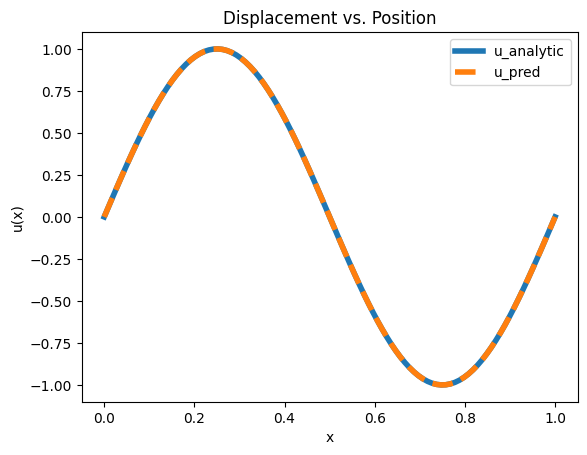

In [9]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_test.detach().numpy(), u_analytic(x_test.detach().numpy()), label='u_analytic', lw=4)
plt.plot(x_test.detach().numpy(), u_test.detach().numpy(), label='u_pred', linestyle='--', lw=4)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Displacement vs. Position')
plt.savefig("../figures/0101.png")

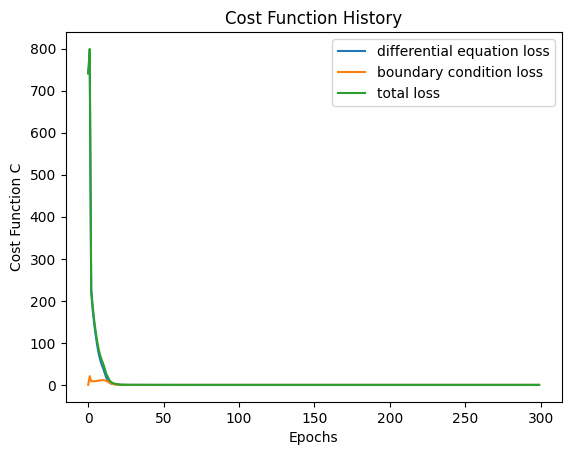

In [10]:
# plot the losses
cost_hist = np.array(pinnModel.loss_history)
plt.plot(cost_hist[:,0], label='differential equation loss')
plt.plot(cost_hist[:,1], label='boundary condition loss')
plt.plot(cost_hist[:,2], label='total loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cost Function C')
plt.title('Cost Function History')
plt.savefig("../figures/0102.png")